In [12]:
# Adding dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os

In [3]:
# Import the data
data_to_read = os.path.join('Resources','PyBer_ride_data.csv')

# Convert to Dataframe
pyber_ride_df = pd.read_csv(data_to_read)
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


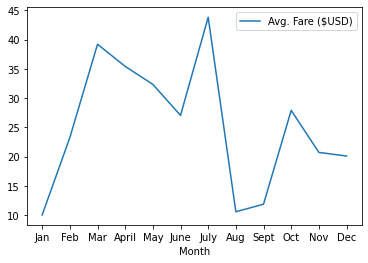

In [8]:
# Set x-axis and tick locations
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]

# Plotting to the dataframe
pyber_ride_df.plot('Month', 'Avg. Fare ($USD)')
plt.xticks(tick_locations,pyber_ride_df['Month'])
plt.show()

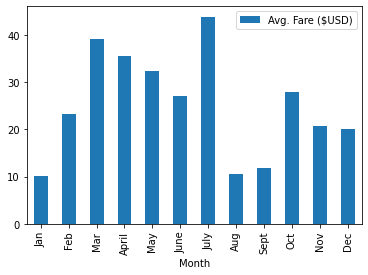

In [11]:
# Creating a bar chart
pyber_ride_df.plot('Month', 'Avg. Fare ($USD)', kind='bar')
plt.show()

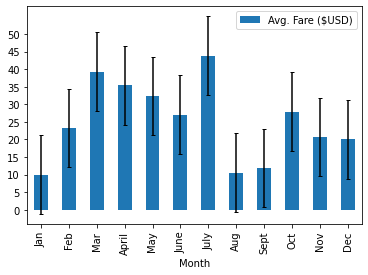

In [14]:
# Creating an Error bar display
pyber_ride_df.plot('Month', 'Avg. Fare ($USD)', kind='bar', yerr=statistics.stdev(pyber_ride_df['Avg. Fare ($USD)']), capsize=2)
plt.yticks(np.arange(0,51,step=5))
plt.show()

In [17]:
# Import the datafiles
load_city_data = os.path.join('Resources', 'city_data.csv')
load_ride_data = os.path.join('Resources', 'ride_data.csv')

city_df = pd.read_csv(load_city_data)
ride_df = pd.read_csv(load_ride_data)
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [16]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [20]:
city_df.isna().sum()
ride_df.isna().sum()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [30]:
# Check the data types of the columns
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [29]:
# Check the data types of the columns
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [40]:
# Get unique cities
city_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [44]:
# Sum of Urban cities
urban_city_count = sum(city_df['type'] == 'Urban')
suburban_city_count = sum(city_df['type'] == 'Suburban')
rural_city_count = sum(city_df['type'] == 'Rural')
city_counts = (urban_city_count,suburban_city_count,rural_city_count)
city_counts

(66, 36, 18)

In [48]:
# Merge the data frames
pyber_data_df = pd.merge(ride_df,city_df, how='left', on= ['city','city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
